In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import pandas as pd
import numpy as np

In [14]:
mnist = tf.keras.datasets.mnist

In [15]:
(x_train , y_train), (x_test, y_test) =  mnist.load_data()

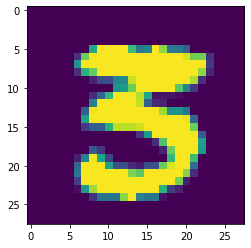

In [16]:
plt.imshow(x_train[2200])

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
28 * 28

784

In [19]:
x_train, x_test =  x_train / 255.0 , x_test / 255.0

In [20]:
x_train.shape

(60000, 28, 28)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam' , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,epochs=5, validation_data=(x_test, y_test))

Epoch 1/5


C:\Users\kashishpc\AppData\Roaming\Python\Python38\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


1875/1875 [==============================] - 25s 13ms/step - loss: 0.2283 - accuracy: 0.9338 - val_loss: 0.1229 - val_accuracy: 0.9634
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0958 - accuracy: 0.9709 - val_loss: 0.0855 - val_accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0632 - accuracy: 0.9797 - val_loss: 0.0832 - val_accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0671 - val_accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0728 - val_accuracy: 0.9780


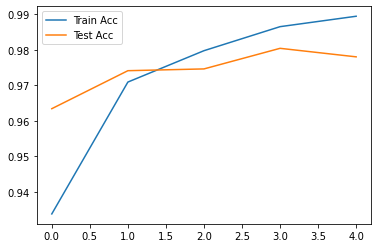

In [28]:
plt.plot(model.history.history['accuracy'], label='Train Acc')
plt.plot(model.history.history['val_accuracy'], label='Test Acc')
plt.legend()
plt.show()

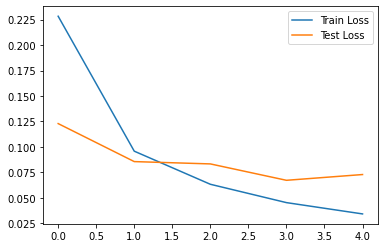

In [29]:
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()